In [1]:
import numpy as np
import matplotlib.pyplot as plt

directions = [
    (0, 1), 
    (np.sqrt(3)/2, 0.5), 
    (-np.sqrt(3)/2, 0.5), 
    (-np.sqrt(3)/2, -0.5), 
    (np.sqrt(3)/2, -0.5), 
    (0, -1)
]

# Function to create extra coordinates for given set of directions
def create_extra_coords(directions, scale):
    scaled_directions = [(x*scale, y*scale) for x, y in directions]
    origin = [(0,0)]
    extra_coords = []
    for x, y in scaled_directions:
        if x == 0:
            continue
        extra_coords.append((x, y))
        if y > 0:
            extra_coords.append((x, y - 1))
        elif y < 0:
            extra_coords.append((x, y + 1))
    return extra_coords
    

# Original directions
extra_original = []
for x, y in directions:
    extra_original.append((x, y))
    if y > 0:
        extra_original.append((x, y + 1))
        extra_original.append((x, y + 2))
    elif y < 0:
        extra_original.append((x, y - 1))
        extra_original.append((x, y - 2))

# Directions scaled by 2
extra_coords_2 = []
scaled_2 = [(x*2, y*2) for x, y in directions]
for x, y in scaled_2:
    extra_coords_2.append((x, y))
    extra_coords_2.append((x, y + 1))
    extra_coords_2.append((x, y - 1))

# Directions scaled by 3
extra_coords_3 = []
scaled_3 = [(x*3, y*3) for x, y in directions]
for x, y in scaled_3:
    if x != 0:
        extra_coords_3.append((x, y))
        if y > 0:
            extra_coords_3.append((x, y - 1))
        elif y < 0:
            extra_coords_3.append((x, y + 1))

# Combine all extra coordinates
all_coords = [(0,0)] + extra_original + extra_coords_2 + extra_coords_3

# Print results
print("Original directions with extra coordinates:", extra_original)
print("Directions multiplied by 2 with extra coordinates:", extra_coords_2)
print("Directions multiplied by 3 with extra coordinates:", extra_coords_3)




Original directions with extra coordinates: [(0, 1), (0, 2), (0, 3), (0.8660254037844386, 0.5), (0.8660254037844386, 1.5), (0.8660254037844386, 2.5), (-0.8660254037844386, 0.5), (-0.8660254037844386, 1.5), (-0.8660254037844386, 2.5), (-0.8660254037844386, -0.5), (-0.8660254037844386, -1.5), (-0.8660254037844386, -2.5), (0.8660254037844386, -0.5), (0.8660254037844386, -1.5), (0.8660254037844386, -2.5), (0, -1), (0, -2), (0, -3)]
Directions multiplied by 2 with extra coordinates: [(0, 2), (0, 3), (0, 1), (1.7320508075688772, 1.0), (1.7320508075688772, 2.0), (1.7320508075688772, 0.0), (-1.7320508075688772, 1.0), (-1.7320508075688772, 2.0), (-1.7320508075688772, 0.0), (-1.7320508075688772, -1.0), (-1.7320508075688772, 0.0), (-1.7320508075688772, -2.0), (1.7320508075688772, -1.0), (1.7320508075688772, 0.0), (1.7320508075688772, -2.0), (0, -2), (0, -1), (0, -3)]
Directions multiplied by 3 with extra coordinates: [(2.598076211353316, 1.5), (2.598076211353316, 0.5), (-2.598076211353316, 1.5), 

In [2]:
all_coords = list(set(all_coords))

In [3]:
#user distances
radius = 1/np.sqrt(3)
user_distances = np.linspace(radius/10, radius, 10)
user_coords = [(dist, 0) for dist in user_distances]

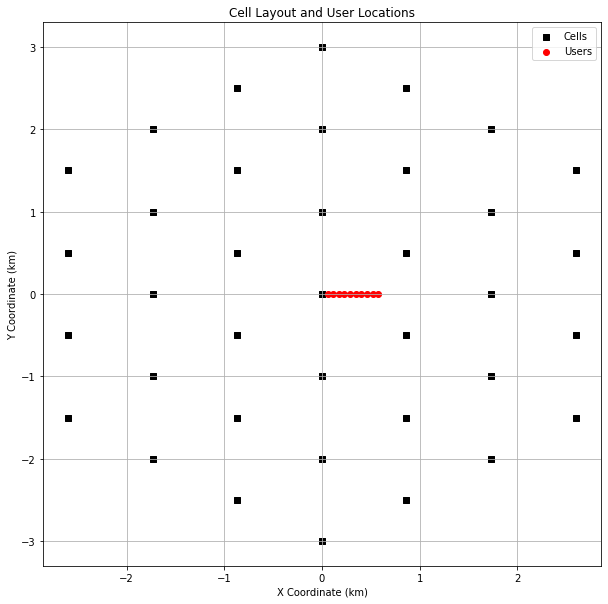

In [4]:
# Plotting
cell_x, cell_y = zip(*all_coords)
user_x, user_y = zip(*user_coords)

# Plotting the hexagonal cells and user locations
plt.figure(figsize=(10, 10))
plt.scatter(cell_x, cell_y, c='black', label='Cells', marker='s')
plt.scatter(user_x, user_y, c='red', label='Users', marker='o')
plt.title('Cell Layout and User Locations')
plt.xlabel('X Coordinate (km)')
plt.ylabel('Y Coordinate (km)')
plt.grid(True)
plt.legend()
plt.show()

In [5]:
all_coords_filtered = [(x, y) for x, y in all_coords if (x, y) != (0, 0)]

In [6]:
user_coords

[(0.05773502691896258, 0),
 (0.11547005383792516, 0),
 (0.17320508075688773, 0),
 (0.23094010767585033, 0),
 (0.2886751345948129, 0),
 (0.3464101615137755, 0),
 (0.40414518843273806, 0),
 (0.46188021535170065, 0),
 (0.5196152422706632, 0),
 (0.5773502691896258, 0)]

In [7]:
def calculate_distances(users, cells):
    distances = {}
    for i, user in enumerate(users):
        user_distances = []
        for cell in cells:
            distance = np.sqrt((cell[0] - user[0])**2 + (cell[1] - user[1])**2)
            user_distances.append((cell, distance))
        distances[i] = user_distances
    return distances

# Get distances
distances = calculate_distances(user_coords, all_coords_filtered)

In [8]:
import pandas as pd

# Read Excel file
excel_file = pd.ExcelFile('C:/Users/aniez/Desktop/Mobile Networks/mobile networks.xlsx')

# Create a dictionary to store dataframes
dfs = {}

# Process each sheet in the Excel file
for sheet_name in excel_file.sheet_names:
    df = excel_file.parse(sheet_name, header=0, index_col=0)
    
    # Store dataframe with sheet name as key
    dfs[sheet_name] = df

# Access the dataframes using sheet names as keys
for sheet_name, df in dfs.items():
    print(f"DataFrame for sheet '{sheet_name}':")
    print(df)
    print()


DataFrame for sheet 'User-0':
           User-0, PRB-1  User-0, PRB-2  User-0, PRB-3  User-0, PRB-4  \
time step                                                               
1              -9.515684      -4.738718      -2.042785      -0.853522   
2              -9.226600      -4.592999      -1.953197      -0.787576   
3              -8.947768      -4.450482      -1.865278      -0.722876   
4              -8.678552      -4.311074      -1.779002      -0.659404   
5              -8.418385      -4.174687      -1.694341      -0.597146   
...                  ...            ...            ...            ...   
4996            2.832922       2.572150       1.597480       1.117300   
4997            2.871886       2.580507       1.593801       1.099373   
4998            2.909962       2.588306       1.589872       1.081287   
4999            2.947157       2.595555       1.585703       1.063055   
5000            2.983490       2.602262       1.581302       1.044689   

           User-0, P

In [9]:
first_key = list(dfs.keys())[0]
first_value = dfs[first_key]

In [10]:
first_value

User-0, PRB-1  User-0, PRB-2  User-0, PRB-3  User-0, PRB-4  \
time step                                                               
1              -9.515684      -4.738718      -2.042785      -0.853522   
2              -9.226600      -4.592999      -1.953197      -0.787576   
3              -8.947768      -4.450482      -1.865278      -0.722876   
4              -8.678552      -4.311074      -1.779002      -0.659404   
5              -8.418385      -4.174687      -1.694341      -0.597146   
...                  ...            ...            ...            ...   
4996            2.832922       2.572150       1.597480       1.117300   
4997            2.871886       2.580507       1.593801       1.099373   
4998            2.909962       2.588306       1.589872       1.081287   
4999            2.947157       2.595555       1.585703       1.063055   
5000            2.983490       2.602262       1.581302       1.044689   

           User-0, PRB-5  User-0, PRB-6  User-0, PRB-7  User-0, PRB-8  \
time step                                                               
1              -0.974913      -2.673226      -7.405101     -14.339563   
2              -0.923429      -2.637796      -7.377072     -14.179625   
3              -0.873113      -2.603549      -7.350215     -14.021378   
4              -0.823953      -2.570477      -7.324503     -13.864779   
5              -0.775938      -2.538570      -7.299926     -13.709788   
...                  ...            ...            ...            ...   
4996           -0.379296      -0.557940       2.740908       5.227588   
4997           -0.411691      -0.510655       2.813899       5.276091   
4998           -0.443300      -0.461523       2.886400       5.323972   
4999           -0.474077      -0.410613       2.958394       5.371233   
5000           -0.503974      -0.358000       3.029865       5.417866   

           User-0, PRB-9  User-0, PRB-10  ...  User-0, PRB-41  User-0, PRB-42  \
time step                                 ...                                   
1              -8.675506       -5.399899  ...       -2.133565       -0.212198   
2              -8.587764       -5.331439  ...       -2.097591       -0.192297   
3              -8.499111       -5.262216  ...       -2.062549       -0.173134   
4              -8.409607       -5.192276  ...       -2.028426       -0.154702   
5              -8.319317       -5.121661  ...       -1.995210       -0.136998   
...                  ...             ...  ...             ...             ...   
4996            6.228437        7.012882  ...        5.688090        5.576507   
4997            6.264061        7.043406  ...        5.673423        5.561883   
4998            6.299141        7.073285  ...        5.658201        5.546555   
4999            6.333682        7.102524  ...        5.642424        5.530520   
5000            6.367677        7.131121  ...        5.626084        5.513778   

           User-0, PRB-43  User-0, PRB-44  User-0, PRB-45  User-0, PRB-46  \
time step                                                                   
1                1.121559        1.066815       -1.110819       -5.323290   
2                1.126871        1.052051       -1.152552       -5.412760   
3                1.131388        1.036348       -1.195571       -5.504654   
4                1.135115        1.019699       -1.239889       -5.599033   
5                1.138050        1.002100       -1.285523       -5.695956   
...                   ...             ...             ...             ...   
4996             4.440847        1.684504       -2.278285       -4.887161   
4997             4.414551        1.646482       -2.301275       -4.886969   
4998             4.387425        1.607633       -2.324946       -4.887686   
4999             4.359466        1.567964       -2.349302       -4.889302   
5000             4.330674        1.527459       -2.374356       -4.891816   

           User-0, PRB-47  User-0, PRB-48  User-0, PRB-

In [11]:
dfs_copy2 = dfs.copy()

In [12]:
import re
dfs_new = {}
for i in range(1, len(dfs_copy2)):
    df4 = dfs_copy2[list(dfs_copy2.keys())[i]]
    new_columns = [col.replace('User-0', f'User-{i}') for col in df4.columns]
    df4.columns = new_columns  # Assign new column names to the dataframe
    dfs_new[f"DataFrame {i}"] = df4

    # Print the updated dataframe
    print(f"DataFrame for sheet '{excel_file.sheet_names[i]}':")
    print(df4)
    print()

DataFrame for sheet 'User-1':
           User-1, PRB-1  User-1, PRB-2  User-1, PRB-3  User-1, PRB-4  \
time step                                                               
1               0.636442       0.092895       0.977950      -1.079639   
2               0.575919       0.075187       0.955805      -1.140789   
3               0.515006       0.057654       0.933430      -1.202541   
4               0.453708       0.040295       0.910825      -1.264895   
5               0.392033       0.023108       0.887987      -1.327853   
...                  ...            ...            ...            ...   
4996           -3.213538      -5.907159       0.060584       2.193094   
4997           -3.324159      -5.951350       0.080119       2.179855   
4998           -3.436253      -5.992555       0.099040       2.165930   
4999           -3.549821      -6.030694       0.117353       2.151321   
5000           -3.664868      -6.065694       0.135047       2.136020   

           User-1, P

In [13]:
first_df = dfs[list(dfs.keys())[0]]
combined_df = first_df.append(dfs_copy2, ignore_index=True)

In [14]:
first_df = dfs_copy2[list(dfs_copy2.keys())[0]]

In [15]:
dfs

{'User-0':            User-0, PRB-1  User-0, PRB-2  User-0, PRB-3  User-0, PRB-4  \
 time step                                                               
 1              -9.515684      -4.738718      -2.042785      -0.853522   
 2              -9.226600      -4.592999      -1.953197      -0.787576   
 3              -8.947768      -4.450482      -1.865278      -0.722876   
 4              -8.678552      -4.311074      -1.779002      -0.659404   
 5              -8.418385      -4.174687      -1.694341      -0.597146   
 ...                  ...            ...            ...            ...   
 4996            2.832922       2.572150       1.597480       1.117300   
 4997            2.871886       2.580507       1.593801       1.099373   
 4998            2.909962       2.588306       1.589872       1.081287   
 4999            2.947157       2.595555       1.585703       1.063055   
 5000            2.983490       2.602262       1.581302       1.044689   
 
            User-0, PRB-5 

In [16]:
manipulated_dfs = {}

# Iterate over users (assume users are keys in dfs dictionary)
for user_key, df in dfs.items():
    user_manipulated_dfs = {}
    
    # Iterate over cells
    for b in range(37):
        start_tti = 135 * b
        
        # Manipulate each SRB column
        manipulated_df = pd.DataFrame(index=range(5000))
        
        for srb in df.columns:
            trace = df[srb].values
            part1 = trace[start_tti:]
            part2 = trace[:start_tti]
            new_trace = list(part1) + list(part2)
            manipulated_df[srb] = new_trace[:5000]  # Ensure we only take 5000 values
        
        user_manipulated_dfs[f'Cell-{b}'] = manipulated_df
    
    manipulated_dfs[user_key] = user_manipulated_dfs

# To access and print the new traces for a specific user and cell:
for user_key, cell_dfs in manipulated_dfs.items():
    print(f"User: {user_key}")
    for cell_key, df in cell_dfs.items():
        print(f"Cell: {cell_key}")
        print(df)
        print()

User: User-0
Cell: Cell-0
      User-0, PRB-1  User-0, PRB-2  User-0, PRB-3  User-0, PRB-4  \
0         -9.515684      -4.738718      -2.042785      -0.853522   
1         -9.226600      -4.592999      -1.953197      -0.787576   
2         -8.947768      -4.450482      -1.865278      -0.722876   
3         -8.678552      -4.311074      -1.779002      -0.659404   
4         -8.418385      -4.174687      -1.694341      -0.597146   
...             ...            ...            ...            ...   
4995       2.832922       2.572150       1.597480       1.117300   
4996       2.871886       2.580507       1.593801       1.099373   
4997       2.909962       2.588306       1.589872       1.081287   
4998       2.947157       2.595555       1.585703       1.063055   
4999       2.983490       2.602262       1.581302       1.044689   

      User-0, PRB-5  User-0, PRB-6  User-0, PRB-7  User-0, PRB-8  \
0         -0.974913      -2.673226      -7.405101     -14.339563   
1         -0.923429  

In [17]:
a=  manipulated_dfs[list( manipulated_dfs.keys())[0]]
a

{'Cell-0':       User-0, PRB-1  User-0, PRB-2  User-0, PRB-3  User-0, PRB-4  \
 0         -9.515684      -4.738718      -2.042785      -0.853522   
 1         -9.226600      -4.592999      -1.953197      -0.787576   
 2         -8.947768      -4.450482      -1.865278      -0.722876   
 3         -8.678552      -4.311074      -1.779002      -0.659404   
 4         -8.418385      -4.174687      -1.694341      -0.597146   
 ...             ...            ...            ...            ...   
 4995       2.832922       2.572150       1.597480       1.117300   
 4996       2.871886       2.580507       1.593801       1.099373   
 4997       2.909962       2.588306       1.589872       1.081287   
 4998       2.947157       2.595555       1.585703       1.063055   
 4999       2.983490       2.602262       1.581302       1.044689   
 
       User-0, PRB-5  User-0, PRB-6  User-0, PRB-7  User-0, PRB-8  \
 0         -0.974913      -2.673226      -7.405101     -14.339563   
 1         -0.923429  

In [18]:
user_coords[0][0]

0.05773502691896258

In [19]:
gains = {}

# Iterate over each user and compute gains
for user_key, user_dfs in manipulated_dfs.items():
    user_gains = {}
    
    # Get the distance to cell 0
    distance_to_cell_0 = distances_to_cell_0[user_key]
    
    # Compute the gain for cell 0
    gain_to_cell_0 = -(115 + 35 * np.log10(distance_to_cell_0))
    cell_0_df = user_dfs['Cell-0']
    gain_df_cell_0 = cell_0_df.apply(lambda trace: gain_to_cell_0 + trace, axis=0)
    user_gains['Cell-0'] = gain_df_cell_0
    
    # Compute gains for other cells
    for cell_key, distance in distances_to_other_cells[user_key].items():
        gain_to_cell = -(115 + 35 * np.log10(distance))
        cell_df = user_dfs[cell_key]
        gain_df = cell_df.apply(lambda trace: gain_to_cell + trace, axis=0)
        user_gains[cell_key] = gain_df
    
    gains[user_key] = user_gains

# To access and print the gains for a specific user and cell:
for user_key, cell_gains in gains.items():
    print(f"Gains for User: {user_key}")
    for cell_key, df in cell_gains.items():
        print(f"Cell: {cell_key}")
        print(df)
        print()

NameError: name 'distances_to_cell_0' is not defined

In [20]:
user_coords2 = {f'User-{i}': coord for i, coord in enumerate(user_coords)}

# Print the dictionary
print(user_coords2)

{'User-0': (0.05773502691896258, 0), 'User-1': (0.11547005383792516, 0), 'User-2': (0.17320508075688773, 0), 'User-3': (0.23094010767585033, 0), 'User-4': (0.2886751345948129, 0), 'User-5': (0.3464101615137755, 0), 'User-6': (0.40414518843273806, 0), 'User-7': (0.46188021535170065, 0), 'User-8': (0.5196152422706632, 0), 'User-9': (0.5773502691896258, 0)}


Cell 0: (0, 0)
Cell 1: (0.8660254037844386, 0.5)
Cell 2: (-0.8660254037844386, 0.5)
Cell 3: (-0.8660254037844386, -0.5)
Cell 4: (0.8660254037844386, -0.5)
Cell 5: (0, 1)
Cell 6: (0, -1)
Cell 7: (1.7320508075688772, 0.0)
Cell 8: (0.8660254037844386, 1.5)
Cell 9: (-0.8660254037844386, 1.5)
Cell 10: (-1.7320508075688772, 0.0)
Cell 11: (-0.8660254037844386, -1.5)
Cell 12: (0.8660254037844386, -1.5)
Cell 13: (1.7320508075688772, 1.0)
Cell 14: (-1.7320508075688772, 1.0)
Cell 15: (-1.7320508075688772, -1.0)
Cell 16: (1.7320508075688772, -1.0)
Cell 17: (0, 2)
Cell 18: (0, -2)
Cell 19: (2.598076211353316, 0.5)
Cell 20: (1.7320508075688772, 2.0)
Cell 21: (0.8660254037844386, 2.5)
Cell 22: (-0.8660254037844386, 2.5)
Cell 23: (-1.7320508075688772, 2.0)
Cell 24: (-2.598076211353316, 0.5)
Cell 25: (-2.598076211353316, -0.5)
Cell 26: (-1.7320508075688772, -2.0)
Cell 27: (-0.8660254037844386, -2.5)
Cell 28: (0.8660254037844386, -2.5)
Cell 29: (1.7320508075688772, -2.0)
Cell 30: (2.598076211353316, -0.

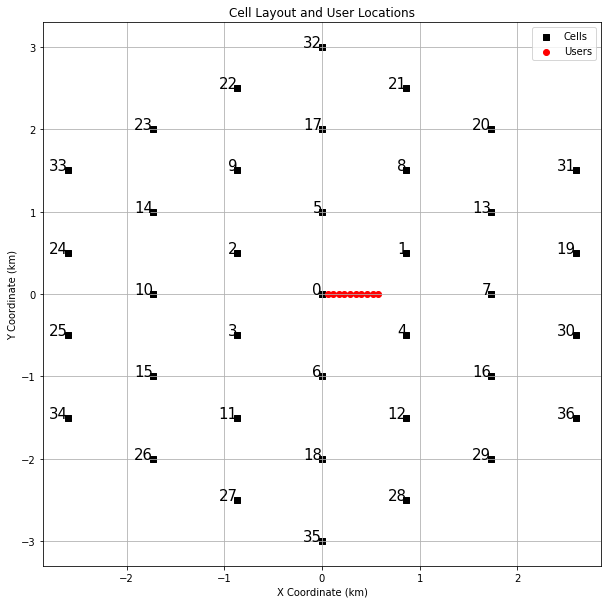

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Define directions for hexagon vertices
directions = [
    (0, 1), 
    (np.sqrt(3)/2, 0.5), 
    (-np.sqrt(3)/2, 0.5), 
    (-np.sqrt(3)/2, -0.5), 
    (np.sqrt(3)/2, -0.5), 
    (0, -1)
]

# Function to create extra coordinates for given set of directions
def create_extra_coords(directions, scale):
    scaled_directions = [(x*scale, y*scale) for x, y in directions]
    extra_coords = []
    for x, y in scaled_directions:
        if x == 0:
            continue
        extra_coords.append((x, y))
        if y > 0:
            extra_coords.append((x, y - 1))
        elif y < 0:
            extra_coords.append((x, y + 1))
    return extra_coords

# Original directions
extra_original = []
for x, y in directions:
    extra_original.append((x, y))
    if y > 0:
        extra_original.append((x, y + 1))
        extra_original.append((x, y + 2))
    elif y < 0:
        extra_original.append((x, y - 1))
        extra_original.append((x, y - 2))

# Directions scaled by 2
extra_coords_2 = []
scaled_2 = [(x*2, y*2) for x, y in directions]
for x, y in scaled_2:
    extra_coords_2.append((x, y))
    extra_coords_2.append((x, y + 1))
    extra_coords_2.append((x, y - 1))

# Directions scaled by 3
extra_coords_3 = []
scaled_3 = [(x*3, y*3) for x, y in directions]
for x, y in scaled_3:
    if x != 0:
        extra_coords_3.append((x, y))
        if y > 0:
            extra_coords_3.append((x, y - 1))
        elif y < 0:
            extra_coords_3.append((x, y + 1))

# Combine all extra coordinates
all_coords = [(0, 0)] + extra_original + extra_coords_2 + extra_coords_3

# Remove duplicate coordinates
all_coords = list(set(all_coords))

# Sorting coordinates in a clockwise spiral
def polar_angle(x, y):
    return (np.arctan2(y, x) + 2 * np.pi) % (2 * np.pi)

center = (0, 0)
all_coords_sorted = sorted(all_coords, key=lambda coord: (np.hypot(coord[0] - center[0], coord[1] - center[1]), polar_angle(coord[0] - center[0], coord[1] - center[1])))

# Labeling coordinates
coord_labels = {index: coord for index, coord in enumerate(all_coords_sorted)}

# Print labeled coordinates
for label, coord in coord_labels.items():
    print(f"Cell {label}: {coord}")

# Plotting
cell_x, cell_y = zip(*all_coords_sorted)
#user_x, user_y = zip(*user_coordinates_dict.values())

plt.figure(figsize=(10, 10))
plt.scatter(cell_x, cell_y, c='black', label='Cells', marker='s')
plt.scatter(user_x, user_y, c='red', label='Users', marker='o')

# Adding labels to the cells
for label, (x, y) in coord_labels.items():
    plt.text(x, y, str(label), fontsize=15, ha='right')

plt.title('Cell Layout and User Locations')
plt.xlabel('X Coordinate (km)')
plt.ylabel('Y Coordinate (km)')
plt.grid(True)
plt.legend()
plt.show()


In [22]:
renamed_coord_labels = {}
new_keys_order = [
    "Cell 0", "Cell 2", "Cell 6", "Cell 5", "Cell 3", "Cell 1", "Cell 4", "Cell 11",
    "Cell 9", "Cell 7", "Cell 17", "Cell 15", "Cell 13", "Cell 10", "Cell 18", "Cell 16",
    "Cell 12", "Cell 8", "Cell 14", "Cell 25", "Cell 23", "Cell 22", "Cell 20", "Cell 19",
    "Cell 35", "Cell 34", "Cell 32", "Cell 31", "Cell 29", "Cell 28", "Cell 26", "Cell 24",
    "Cell 21", "Cell 36", "Cell 33", "Cell 30", "Cell 27"
]

for index, key in enumerate(new_keys_order):
    renamed_coord_labels[key] = coord_labels[index]

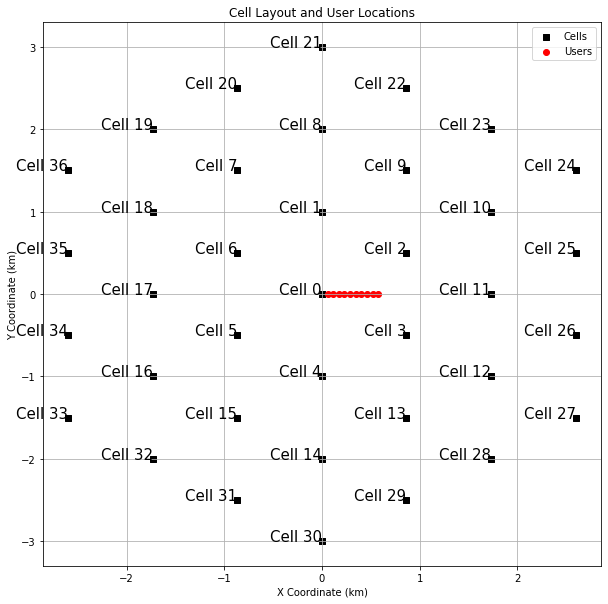

In [23]:
# Plotting
cell_x, cell_y = zip(*all_coords_sorted)
#user_x, user_y = zip(*user_coordinates_dict.values())

plt.figure(figsize=(10, 10))
plt.scatter(cell_x, cell_y, c='black', label='Cells', marker='s')
plt.scatter(user_x, user_y, c='red', label='Users', marker='o')

# Adding labels to the cells
for label, (x, y) in renamed_coord_labels.items():
    plt.text(x, y, str(label), fontsize=15, ha='right')

plt.title('Cell Layout and User Locations')
plt.xlabel('X Coordinate (km)')
plt.ylabel('Y Coordinate (km)')
plt.grid(True)
plt.legend()
plt.show()

In [24]:
user_coords2

{'User-0': (0.05773502691896258, 0),
 'User-1': (0.11547005383792516, 0),
 'User-2': (0.17320508075688773, 0),
 'User-3': (0.23094010767585033, 0),
 'User-4': (0.2886751345948129, 0),
 'User-5': (0.3464101615137755, 0),
 'User-6': (0.40414518843273806, 0),
 'User-7': (0.46188021535170065, 0),
 'User-8': (0.5196152422706632, 0),
 'User-9': (0.5773502691896258, 0)}

In [25]:
def calculate_distances(users, cells):
    distances = {}
    for i, user in enumerate(users):
        user_distances = []
        for cell in cells:
            distance = np.sqrt((cell[0] - user[0])**2 + (cell[1] - user[1])**2)
            user_distances.append((cell, distance))
        distances[i] = user_distances
    return distances

# Get distances
distances = calculate_distances(user_coords, all_coords_filtered)

In [26]:
user_coords2

{'User-0': (0.05773502691896258, 0),
 'User-1': (0.11547005383792516, 0),
 'User-2': (0.17320508075688773, 0),
 'User-3': (0.23094010767585033, 0),
 'User-4': (0.2886751345948129, 0),
 'User-5': (0.3464101615137755, 0),
 'User-6': (0.40414518843273806, 0),
 'User-7': (0.46188021535170065, 0),
 'User-8': (0.5196152422706632, 0),
 'User-9': (0.5773502691896258, 0)}

In [27]:
renamed_coord_labels

{'Cell 0': (0, 0),
 'Cell 2': (0.8660254037844386, 0.5),
 'Cell 6': (-0.8660254037844386, 0.5),
 'Cell 5': (-0.8660254037844386, -0.5),
 'Cell 3': (0.8660254037844386, -0.5),
 'Cell 1': (0, 1),
 'Cell 4': (0, -1),
 'Cell 11': (1.7320508075688772, 0.0),
 'Cell 9': (0.8660254037844386, 1.5),
 'Cell 7': (-0.8660254037844386, 1.5),
 'Cell 17': (-1.7320508075688772, 0.0),
 'Cell 15': (-0.8660254037844386, -1.5),
 'Cell 13': (0.8660254037844386, -1.5),
 'Cell 10': (1.7320508075688772, 1.0),
 'Cell 18': (-1.7320508075688772, 1.0),
 'Cell 16': (-1.7320508075688772, -1.0),
 'Cell 12': (1.7320508075688772, -1.0),
 'Cell 8': (0, 2),
 'Cell 14': (0, -2),
 'Cell 25': (2.598076211353316, 0.5),
 'Cell 23': (1.7320508075688772, 2.0),
 'Cell 22': (0.8660254037844386, 2.5),
 'Cell 20': (-0.8660254037844386, 2.5),
 'Cell 19': (-1.7320508075688772, 2.0),
 'Cell 35': (-2.598076211353316, 0.5),
 'Cell 34': (-2.598076211353316, -0.5),
 'Cell 32': (-1.7320508075688772, -2.0),
 'Cell 31': (-0.8660254037844386,

In [28]:
# Calculate distances for each user-coordinate pair
distances = {}
for user, user_coord in user_coords2.items():
    distances[user] = {}
    for cell, cell_coord in renamed_coord_labels.items():
        distance = np.linalg.norm(np.array(user_coord) - np.array(cell_coord))
        # Rename the cell keys to have hyphens
        cell_key = cell.replace(" ", "-")
        distances[user][cell_key] = distance

# Print distances
for user, dist in distances.items():
    print(f"Distances for {user}:")
    for cell, distance in dist.items():
        print(f"    {cell}: {distance}")


Distances for User-0:
    Cell-0: 0.05773502691896258
    Cell-2: 0.9504384952922168
    Cell-6: 1.0503967504392486
    Cell-5: 1.0503967504392486
    Cell-3: 0.9504384952922168
    Cell-1: 1.0016652800877812
    Cell-4: 1.0016652800877812
    Cell-11: 1.6743157806499147
    Cell-9: 1.7039170558842744
    Cell-7: 1.7616280348965083
    Cell-17: 1.7897858344878397
    Cell-15: 1.7616280348965083
    Cell-13: 1.7039170558842744
    Cell-10: 1.9502136635080098
    Cell-18: 2.0502032419575706
    Cell-16: 2.0502032419575706
    Cell-12: 1.9502136635080098
    Cell-8: 2.0008331597945226
    Cell-14: 2.0008331597945226
    Cell-25: 2.5890796305508514
    Cell-23: 2.608320021265284
    Cell-22: 2.6274195198584738
    Cell-20: 2.66520793435209
    Cell-19: 2.6839026311200884
    Cell-35: 2.702468007827907
    Cell-34: 2.702468007827907
    Cell-32: 2.6839026311200884
    Cell-31: 2.66520793435209
    Cell-29: 2.6274195198584738
    Cell-28: 2.608320021265284
    Cell-26: 2.5890796305508514
   

In [29]:
a=  manipulated_dfs[list( manipulated_dfs.keys())[0]]
a

{'Cell-0':       User-0, PRB-1  User-0, PRB-2  User-0, PRB-3  User-0, PRB-4  \
 0         -9.515684      -4.738718      -2.042785      -0.853522   
 1         -9.226600      -4.592999      -1.953197      -0.787576   
 2         -8.947768      -4.450482      -1.865278      -0.722876   
 3         -8.678552      -4.311074      -1.779002      -0.659404   
 4         -8.418385      -4.174687      -1.694341      -0.597146   
 ...             ...            ...            ...            ...   
 4995       2.832922       2.572150       1.597480       1.117300   
 4996       2.871886       2.580507       1.593801       1.099373   
 4997       2.909962       2.588306       1.589872       1.081287   
 4998       2.947157       2.595555       1.585703       1.063055   
 4999       2.983490       2.602262       1.581302       1.044689   
 
       User-0, PRB-5  User-0, PRB-6  User-0, PRB-7  User-0, PRB-8  \
 0         -0.974913      -2.673226      -7.405101     -14.339563   
 1         -0.923429  

In [30]:
manipulated_dfs

{'User-0': {'Cell-0':       User-0, PRB-1  User-0, PRB-2  User-0, PRB-3  User-0, PRB-4  \
  0         -9.515684      -4.738718      -2.042785      -0.853522   
  1         -9.226600      -4.592999      -1.953197      -0.787576   
  2         -8.947768      -4.450482      -1.865278      -0.722876   
  3         -8.678552      -4.311074      -1.779002      -0.659404   
  4         -8.418385      -4.174687      -1.694341      -0.597146   
  ...             ...            ...            ...            ...   
  4995       2.832922       2.572150       1.597480       1.117300   
  4996       2.871886       2.580507       1.593801       1.099373   
  4997       2.909962       2.588306       1.589872       1.081287   
  4998       2.947157       2.595555       1.585703       1.063055   
  4999       2.983490       2.602262       1.581302       1.044689   
  
        User-0, PRB-5  User-0, PRB-6  User-0, PRB-7  User-0, PRB-8  \
  0         -0.974913      -2.673226      -7.405101     -14.339563 

In [31]:
import copy
new_dict = copy.deepcopy(manipulated_dfs)

In [32]:
def path_loss(distance_km):
    return -(115 + 35 * np.log10(distance_km))

# Dictionary containing multipath fading dataframe traces
# This dictionary should have keys for users (User-0, User-1, ..., User-9)
# Each user key should contain a nested dictionary with keys for cells (Cell-0, Cell-1, ..., Cell-36)
# The value corresponding to each cell key should be the multipath fading dataframe trace

# Applying path loss model to each user and cell
for user, user_data in new_dict.items():
    for cell, trace_value in user_data.items():
        distance = distances[user][cell]
        # Calculate path loss using the path_loss function
        pl_value = path_loss(distance)
        # Add the path loss to the values in the multipath fading dataframe trace
        new_dict[user][cell] += pl_value

In [33]:
traces_watts = copy.deepcopy(new_dict)

In [34]:
new_dict

{'User-0': {'Cell-0':       User-0, PRB-1  User-0, PRB-2  User-0, PRB-3  User-0, PRB-4  \
  0        -81.166062     -76.389096     -73.693163     -72.503900   
  1        -80.876978     -76.243378     -73.603575     -72.437954   
  2        -80.598146     -76.100861     -73.515656     -72.373254   
  3        -80.328930     -75.961452     -73.429380     -72.309782   
  4        -80.068763     -75.825065     -73.344719     -72.247524   
  ...             ...            ...            ...            ...   
  4995     -68.817456     -69.078228     -70.052898     -70.533078   
  4996     -68.778492     -69.069871     -70.056577     -70.551005   
  4997     -68.740416     -69.062072     -70.060506     -70.569091   
  4998     -68.703221     -69.054823     -70.064675     -70.587323   
  4999     -68.666888     -69.048116     -70.069076     -70.605690   
  
        User-0, PRB-5  User-0, PRB-6  User-0, PRB-7  User-0, PRB-8  \
  0        -72.625291     -74.323604     -79.055479     -85.989941 

In [35]:
rx_power_db = copy.deepcopy(new_dict)

In [36]:
def db_to_watts(db):
    return 10 ** (db / 10)

# Dictionary of dataframes (traces)
#traces_dict = {...}  #  dictionary of dataframes

# Iterate over each dataframe and convert dB to Watts
for user, user_data in rx_power_db.items():
    for cell, trace_value in user_data.items():
        rx_power_db[user][cell] = trace_value.applymap(db_to_watts)

In [37]:
for user, user_data in rx_power_db.items():
    for cell, trace_value in user_data.items():
        rx_power_db[user][cell] = (20/50) * trace_value 

In [38]:
rx_power_watts = copy.deepcopy(rx_power_db)

In [39]:
a=  rx_power_watts[list(rx_power_watts.keys())[0]]
a

{'Cell-0':       User-0, PRB-1  User-0, PRB-2  User-0, PRB-3  User-0, PRB-4  \
 0      3.058115e-09   9.186506e-09   1.709006e-08   2.247346e-08   
 1      3.268603e-09   9.499970e-09   1.744627e-08   2.281732e-08   
 2      3.485342e-09   9.816890e-09   1.780305e-08   2.315979e-08   
 3      3.708232e-09   1.013713e-08   1.816026e-08   2.350075e-08   
 4      3.937166e-09   1.046053e-08   1.851774e-08   2.384007e-08   
 ...             ...            ...            ...            ...   
 4995   5.251875e-08   4.945807e-08   3.951575e-08   3.537954e-08   
 4996   5.299205e-08   4.955333e-08   3.948229e-08   3.523380e-08   
 4997   5.345870e-08   4.964240e-08   3.944658e-08   3.508738e-08   
 4998   5.391851e-08   4.972533e-08   3.940873e-08   3.494039e-08   
 4999   5.437148e-08   4.980219e-08   3.936882e-08   3.479293e-08   
 
       User-0, PRB-5  User-0, PRB-6  User-0, PRB-7  User-0, PRB-8  \
 0      2.185400e-08   1.478086e-08   4.971783e-09   1.007084e-09   
 1      2.211461e-08  

In [40]:
rx_power_watts

{'User-0': {'Cell-0':       User-0, PRB-1  User-0, PRB-2  User-0, PRB-3  User-0, PRB-4  \
  0      3.058115e-09   9.186506e-09   1.709006e-08   2.247346e-08   
  1      3.268603e-09   9.499970e-09   1.744627e-08   2.281732e-08   
  2      3.485342e-09   9.816890e-09   1.780305e-08   2.315979e-08   
  3      3.708232e-09   1.013713e-08   1.816026e-08   2.350075e-08   
  4      3.937166e-09   1.046053e-08   1.851774e-08   2.384007e-08   
  ...             ...            ...            ...            ...   
  4995   5.251875e-08   4.945807e-08   3.951575e-08   3.537954e-08   
  4996   5.299205e-08   4.955333e-08   3.948229e-08   3.523380e-08   
  4997   5.345870e-08   4.964240e-08   3.944658e-08   3.508738e-08   
  4998   5.391851e-08   4.972533e-08   3.940873e-08   3.494039e-08   
  4999   5.437148e-08   4.980219e-08   3.936882e-08   3.479293e-08   
  
        User-0, PRB-5  User-0, PRB-6  User-0, PRB-7  User-0, PRB-8  \
  0      2.185400e-08   1.478086e-08   4.971783e-09   1.007084e-09 

In [41]:
noise_power_W

NameError: name 'noise_power_W' is not defined

In [42]:
import numpy as np
import pandas as pd

# Given parameters
k = 1.380649e-23  # Boltzmann constant
T = 290  # Temperature in Kelvin
B = 180 * 10**3  # SRB bandwidth in Hz

# Calculate noise power (Watts)
noise_power_W = k * T * B


# Initialize a dictionary to store SINR values for Cell-0 for each user
sinr_values = {}

# Convert all dataframes to numpy arrays to speed up calculations
rx_power_watts_np = {user: {cell: df.values for cell, df in user_data.items()} for user, user_data in rx_power_watts.items()}

# Calculate SINR for Cell-0 for each user
for user, user_data in rx_power_watts_np.items():
    sinr_values[user] = {}
    cell_data = user_data['Cell-0']
    
    # Iterate over the PRBs and calculate SINR for each PRB
    for prb in range(1, 51):  # PRBs are from 1 to 50
        # Extract the power of the current user for the current PRB in Cell-0
        user_power_prb = cell_data[:, prb - 1]
        
        # Calculate interference power from other cells for the current PRB
        interference_power_W = np.sum(
            np.array([user_data[other_cell][:, prb - 1] for other_cell in user_data if other_cell != 'Cell-0']), axis=0
        )
        
        # Calculate SINR for the current PRB
        sinr_W = user_power_prb / (interference_power_W + noise_power_W)
        
        # Convert SINR to dB
        sinr_dB = 10 * np.log10(sinr_W)
        
        # Store SINR values for the current PRB
        sinr_values[user][f'PRB-{prb}'] = sinr_dB



In [ ]:
sinr_values

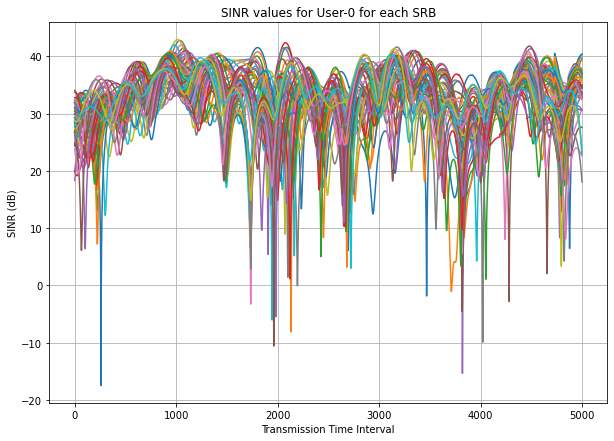

In [43]:
import matplotlib.pyplot as plt

# Extract SINR values for User-0
user_0_sinr = sinr_values['User-0']

# Prepare data for plotting
prbs = list(user_0_sinr.keys())
sinr_dB_values = [user_0_sinr[prb] for prb in prbs]

# Convert list of arrays to a single array for plotting
sinr_dB_array = np.array(sinr_dB_values)

# Plotting SINR values
plt.figure(figsize=(10, 7))
for prb_index, prb in enumerate(prbs):
    plt.plot(sinr_dB_array[prb_index, :], label=f'{prb}')

plt.xlabel('Transmission Time Interval')
plt.ylabel('SINR (dB)')
plt.title('SINR values for User-0 for each SRB')
#plt.legend(loc='upper right', ncol=5, fontsize='small')
plt.grid(True)
plt.show()


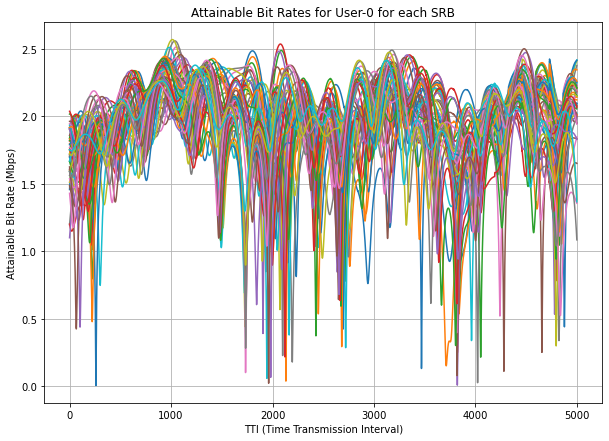

In [44]:
import matplotlib.pyplot as plt
import numpy as np

# Define the SRB bandwidth in Hz
B = 180 * 1000  # 180 kHz

# Function to convert SINR (in dB) to linear scale
def db_to_linear(db):
    return 10 ** (db / 10)

# Convert SINR to attainable bit rate using Shannon formula
def calculate_bit_rate(sinr_db):
    sinr_linear = db_to_linear(sinr_db)
    return B * np.log2(1 + sinr_linear)

# Calculate attainable bit rates for User-0 for each PRB
bit_rate_values = {}
user_0_sinr = sinr_values['User-0']

for prb, sinr_array in user_0_sinr.items():
    bit_rate_values[prb] = calculate_bit_rate(sinr_array)

# Prepare data for plotting
prbs = list(bit_rate_values.keys())
bit_rate_array = np.array([bit_rate_values[prb] for prb in prbs])/1e6

# Plotting attainable bit rates
plt.figure(figsize=(10, 7))
for prb_index, prb in enumerate(prbs):
    plt.plot(bit_rate_array[prb_index, :], label=f'{prb}')

plt.xlabel('TTI (Time Transmission Interval)')
plt.ylabel('Attainable Bit Rate (Mbps)')
plt.title('Attainable Bit Rates for User-0 for each SRB')
#plt.legend(loc='upper right', ncol=5, fontsize='small')
plt.grid(True)
plt.show()


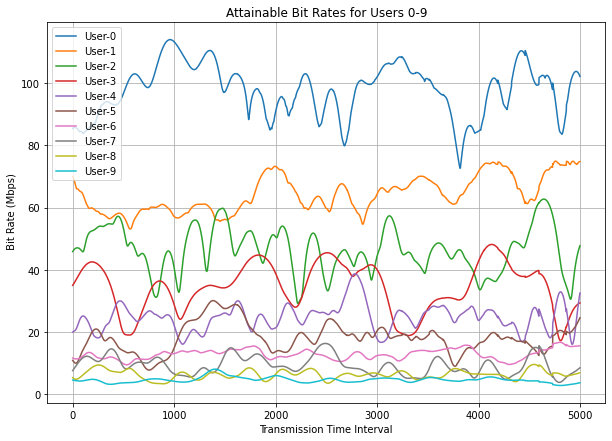

In [45]:


# Plotting attainable bit rates for each user
plt.figure(figsize=(10, 7))

for user, sinr_data in sinr_values.items():
    bit_rate_values = []
    for prb, sinr_array in sinr_data.items():
        bit_rate_values.append(calculate_bit_rate(sinr_array))
    avg_bit_rate = (np.sum(np.vstack(bit_rate_values), axis=0)/1e6)
    plt.plot(avg_bit_rate, label=f'User-{user.split("-")[-1]}')

plt.xlabel('Transmission Time Interval')
plt.ylabel(' Bit Rate (Mbps)')
plt.title('Attainable Bit Rates for Users 0-9')
plt.legend()
plt.grid(True)
plt.show()


In [46]:

bit_rate_values2 = {}
for user, sinr_data in sinr_values.items():
    bit_rate_values2[user] = {}
    for prb, sinr_array in sinr_data.items():
        bit_rate_values2[user][prb] = calculate_bit_rate(sinr_array)
    

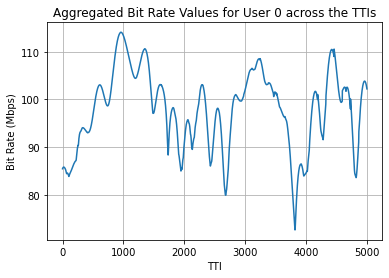

In [47]:
aggregated_bit_rate_values = {}

# Sum the bit rate values across all PRBs for each TTI
for user, prb_data in bit_rate_values2.items():
    aggregated_bit_rate_values[user] = np.sum(list(prb_data.values()), axis=0)/1e6

# Extract the aggregated bit rate values for User 0
aggregated_bit_rates_user_0 = aggregated_bit_rate_values['User-0']

# Extract TTI indices
tti_indices = np.arange(len(aggregated_bit_rates_user_0))

# Plot the aggregated bit rate values for User 0
plt.plot(tti_indices, aggregated_bit_rates_user_0)
plt.title('Aggregated Bit Rate Values for User 0 across the TTIs')
plt.xlabel('TTI')
plt.ylabel('Bit Rate (Mbps)')
plt.grid(True)
plt.show()

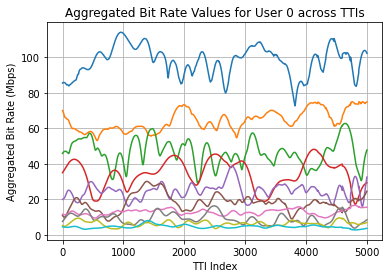

In [48]:
aggregated_bit_rate_values = {}

# Sum the bit rate values across all PRBs for each TTI
for user, prb_data in bit_rate_values2.items():
    aggregated_bit_rate_values[user] = np.sum(list(prb_data.values()), axis=0)/ 1e6
    tti_indices = np.arange(5000)
    plt.plot(tti_indices, aggregated_bit_rate_values[user])
plt.title('Aggregated Bit Rate Values for User 0 across TTIs')
plt.xlabel('TTI Index')
plt.ylabel('Aggregated Bit Rate (Mbps)')
plt.grid(True)
plt.show()




In [49]:
time_averaged_bit_rates = {}

# Loop through each user and calculate the time-averaged bit rate
for user, aggregated_bit_rate in aggregated_bit_rate_values.items():
    time_averaged_bit_rates[user] = np.mean(aggregated_bit_rate)

# Print the time-averaged bit rate for each user
for user, avg_bit_rate in time_averaged_bit_rates.items():
    print(f' {user}: {avg_bit_rate:.3f} Mbps')

 User-0: 97.883 Mbps
 User-1: 64.282 Mbps
 User-2: 46.371 Mbps
 User-3: 34.428 Mbps
 User-4: 24.655 Mbps
 User-5: 18.022 Mbps
 User-6: 12.801 Mbps
 User-7: 9.194 Mbps
 User-8: 6.237 Mbps
 User-9: 4.493 Mbps


# Round Robin

In [50]:
order_combinations = [
    ['User-0', 'User-1', 'User-2', 'User-3', 'User-4', 'User-5', 'User-6', 'User-7', 'User-8', 'User-9'],
    ['User-1', 'User-2', 'User-3', 'User-4', 'User-5', 'User-6', 'User-7', 'User-8', 'User-9'],
    ['User-2', 'User-3', 'User-4', 'User-5', 'User-6', 'User-7', 'User-8', 'User-9'],
    ['User-3', 'User-4', 'User-5', 'User-6', 'User-7', 'User-8', 'User-9'],
    ['User-4', 'User-5', 'User-6', 'User-7', 'User-8', 'User-9'],
    ['User-5', 'User-6', 'User-7', 'User-8', 'User-9'],
    ['User-6', 'User-7', 'User-8', 'User-9'],
    ['User-7', 'User-8', 'User-9'],
    ['User-8', 'User-9']
]

In [ ]:
throughput_values_rr

In [ ]:
np.sum(throughput_values_rr) ** 2

In [51]:



def simulate_round_robin_scheduling(bit_rate_values2, order):
    num_users = len(order)
    tti_count = 5000
    user_throughput = {user: np.zeros(tti_count) for user in order}
    
    for tti in range(tti_count):
        current_user = order[tti % num_users]
        # Aggregate the bit rate for all PRBs for the current user at this TTI
        total_bit_rate = np.sum([bit_rate_values2[current_user][f'PRB-{prb}'][tti] for prb in range(1, 51)]) / 1e6  # Convert to Mbps
        user_throughput[current_user][tti] = total_bit_rate

    return user_throughput

# Simulate round robin scheduling
order = ['User-0', 'User-1', 'User-2', 'User-3', 'User-4', 'User-5', 'User-6', 'User-7', 'User-8', 'User-9']
user_throughput = simulate_round_robin_scheduling(bit_rate_values2, order)

# Plot the throughput traces for User-8 and User-9
#plt.figure(figsize=(12, 6))
#for user in order:
    #plt.plot(user_throughput[user], label=f'{user} Throughput')

#plt.xlabel('TTI')
#plt.ylabel('Throughput (Mbps)')
#plt.title('Throughput per TTI for Users 8 and 9 (Round Robin Scheduling)')
#plt.legend()
#plt.show()

# Calculate average throughput for each user
average_throughput_rr = {user: np.mean(throughput) for user, throughput in user_throughput.items()}
print("Average Throughput with Round Robin (Mbps):", average_throughput_rr)

# Calculate aggregate cell throughput
cell_throughput_rr = sum(average_throughput_rr.values())
print("Aggregate Cell Throughput with Round Robin (Mbps):", cell_throughput_rr)

# Define Jain's fairness index function
def jains_fairness_index(values):
    return (np.sum(values) ** 2) / (len(values) * np.sum(np.square(values)))

# Calculate throughput fairness
throughput_values_rr = list(average_throughput_rr.values())
throughput_fairness_rr = jains_fairness_index(throughput_values_rr)
print("Throughput Fairness Index with Round Robin:", throughput_fairness_rr)

def calculate_resource_fairness_max_scheduling(user_throughput):
    # Calculate the fraction of time each user has a non-zero throughput
    num_users = len(user_throughput)
    non_zero_time = {user: sum(1 for throughput in throughput_list if throughput != 0) for user, throughput_list in user_throughput.items()}
    total_non_zero_time = sum(non_zero_time.values())
    time_allocation = [non_zero_time[user] / total_non_zero_time for user in user_throughput]
    resource_fairness_index = jains_fairness_index(time_allocation)
    print("Resource Fairness Index:", resource_fairness_index)
    return resource_fairness_index
    # Calculate the resource fairness index
    #return jains_fairness_index(time_allocation)

resource_fairness_index = calculate_resource_fairness_max_scheduling(user_throughput)

Average Throughput with Round Robin (Mbps): {'User-0': 9.78729799472399, 'User-1': 6.427964790731683, 'User-2': 4.6369958209168995, 'User-3': 3.443045873394895, 'User-4': 2.46492813861627, 'User-5': 1.8027820022945449, 'User-6': 1.2802611146353844, 'User-7': 0.9194541374893502, 'User-8': 0.6237515349353006, 'User-9': 0.44928710129286137}
Aggregate Cell Throughput with Round Robin (Mbps): 31.835768509031176
Throughput Fairness Index with Round Robin: 0.5542352210227474
Resource Fairness Index: 0.9999999999999996


In [ ]:
user_throughput

In [ ]:
Timedomain_RR['10 Users'] = {
        'Aggregate Cell Throughput(Mbps)': cell_throughput_rr,
        'Throughput Fairness Index': throughput_fairness_rr,
        'Resource Fairness Index': resource_fairness_index}
results['Time domain RR'] = Timedomain_RR

In [ ]:
results

# Maximum 

### correct one

In [52]:
##correct one
def simulate_maximum_rate_scheduling(bit_rate_values, order):
    num_ttis = 5000
    num_users = len(order)
    user_throughput = {user: np.zeros(num_ttis) for user in order}

    for tti in range(num_ttis):
        max_bit_rate = -np.inf
        max_user = None
        
        for user in order:
            # Aggregate the bit rate for all PRBs for the current user at this TTI
            aggregate_bit_rate = np.sum([bit_rate_values[user][f'PRB-{prb}'][tti] for prb in range(1, 51)]) / 1e6  # Convert to Mbps
            if aggregate_bit_rate > max_bit_rate:
                max_bit_rate = aggregate_bit_rate
                max_user = user

        if max_user is not None:
            # Append the maximum throughput value to the user's list
            user_throughput[max_user][tti] = max_bit_rate
        else:
            # If no user has non-zero throughput, append 0 to all users
            user_throughput[user][tti] = 0

    return user_throughput

# Simulate maximum rate scheduling for different order combinations
maximum_rate_throughput = simulate_maximum_rate_scheduling(bit_rate_values2, order)


In [53]:
maximum_rate_throughput = simulate_maximum_rate_scheduling(bit_rate_values2, order)

# Calculate average throughput for each user
average_throughput_max = {user: np.mean(throughput) for user, throughput in maximum_rate_throughput.items()}
print("Average Throughput with Maximum (Mbps):", average_throughput_max)

# Calculate aggregate cell throughput
aggregate_cell_throughput_max = sum(average_throughput_max.values())   # Convert to Mbps
print("Aggregate Cell Throughput with Maximum (Mbps):", aggregate_cell_throughput_max)

# Define Jain's fairness index function
def jains_fairness_index(values):
    return (np.sum(values) ** 2) / (len(values) * np.sum(np.square(values)))

# Calculate throughput fairness
throughput_values_max = list(average_throughput_max.values())
throughput_fairness_max = jains_fairness_index(throughput_values_max)
print("Throughput Fairness Index with Maximum:", throughput_fairness_max)

#def jains_fairness_index_resource(order):
    #values = list(1/len(order)) 
    #num_users = len(order)
    #values = [1 / num_users] * num_users
# Assuming round-robin allocation, each user gets half the time resources
    #return (np.sum(values) ** 2) / (len(values) * np.sum(np.square(values)))
#resource_fairness_max = jains_fairness_index_resource(order)
#print("Resource Fairness Index with Maximum:", resource_fairness_max)

resource_fairness_index = calculate_resource_fairness_max_scheduling(maximum_rate_throughput)
#print("Resource Fairness Index with Maximum:", resource_fairness_max)

Average Throughput with Maximum (Mbps): {'User-0': 97.88348668675334, 'User-1': 0.0, 'User-2': 0.0, 'User-3': 0.0, 'User-4': 0.0, 'User-5': 0.0, 'User-6': 0.0, 'User-7': 0.0, 'User-8': 0.0, 'User-9': 0.0}
Aggregate Cell Throughput with Maximum (Mbps): 97.88348668675334
Throughput Fairness Index with Maximum: 0.1
Resource Fairness Index: 0.1


In [ ]:
Timedomain_maximum['10 Users'] = {
        'Aggregate Cell Throughput(Mbps)': aggregate_cell_throughput_max,
        'Throughput Fairness Index': throughput_fairness_max,
        'Resource Fairness Index ': resource_fairness_index
}
results['Time domain MR'] = Timedomain_maximum

In [55]:
results

NameError: name 'results' is not defined

# Proportional Fair

In [56]:
##correct one
def simulate_proportional_fair_scheduling(bit_rate_values, average_throughput_values, order):
    num_ttis = 5000
    num_users = len(order)
    user_throughput = {user: np.zeros(num_ttis) for user in order}

    for tti in range(num_ttis):
        max_ratio = -np.inf
        max_user = None
        
        for user in order:
            # Aggregate the bit rate for all PRBs for the current user at this TTI
            aggregate_bit_rate = np.sum([bit_rate_values[user][f'PRB-{prb}'][tti] for prb in range(1, 51)]) / 1e6  # Convert to Mbps
            average_bit_rate = average_throughput_values[user]

            # Compute the ratio
            if average_bit_rate != 0:
                ratio = aggregate_bit_rate / average_bit_rate
                if ratio > max_ratio:
                    max_ratio = ratio
                    max_user = user
        
        if max_user is not None:
            # Append the maximum throughput value to the user's list
            user_throughput[max_user][tti] = np.sum([bit_rate_values[max_user][f'PRB-{prb}'][tti] for prb in range(1, 51)]) / 1e6
        else:
            # If no user has non-zero throughput, append 0 to all users
            user_throughput[user][tti] = 0

    return user_throughput

# Simulate maximum rate scheduling for different order combinations
proportional_fair_throughput = simulate_proportional_fair_scheduling(bit_rate_values2, time_averaged_bit_rates, order)

In [ ]:
proportional_fair_throughput

In [57]:
#maximum_rate_throughput = proportional_fair_throughput 

# Calculate average throughput for each user
average_throughput_max = {user: np.mean(throughput) for user, throughput in proportional_fair_throughput.items()}
print("Average Throughput with Proportional fair (Mbps):", average_throughput_max)

# Calculate aggregate cell throughput
aggregate_cell_throughput_pf = sum(average_throughput_max.values())   # Convert to Mbps
print("Aggregate Cell Throughput with Proportional fair (Mbps):", aggregate_cell_throughput_pf)

# Define Jain's fairness index function
def jains_fairness_index(values):
    return (np.sum(values) ** 2) / (len(values) * np.sum(np.square(values)))

# Calculate throughput fairness
throughput_values_max = list(average_throughput_max.values())
throughput_fairness_max = jains_fairness_index(throughput_values_max)
print("Throughput Fairness Index with Maximum:", throughput_fairness_max)

#def jains_fairness_index_resource(order):
    #values = list(1/len(order)) 
    #num_users = len(order)
    #values = [1 / num_users] * num_users
# Assuming round-robin allocation, each user gets half the time resources
    #return (np.sum(values) ** 2) / (len(values) * np.sum(np.square(values)))
#resource_fairness_max = jains_fairness_index_resource(order)
#print("Resource Fairness Index with Maximum:", resource_fairness_max)

resource_fairness_index = calculate_resource_fairness_max_scheduling(proportional_fair_throughput )
#print("Resource Fairness Index with Maximum:", resource_fairness_max)

Average Throughput with Proportional fair (Mbps): {'User-0': 6.174882112408519, 'User-1': 0.9896368543969409, 'User-2': 2.56852656157471, 'User-3': 5.958046927581601, 'User-4': 2.8081562988740183, 'User-5': 2.9535273959963466, 'User-6': 1.2054675914541877, 'User-7': 3.080220098274399, 'User-8': 1.2198862924262375, 'User-9': 0.4346183860489998}
Aggregate Cell Throughput with Proportional fair (Mbps): 27.39296851903596
Throughput Fairness Index with Maximum: 0.6794952703906034
Resource Fairness Index: 0.72372809130322


In [ ]:
Timedomain_PF['10 Users'] = {
        'Aggregate Cell Throughput(Mbps)': aggregate_cell_throughput_pf,
        'Throughput Fairness Index': throughput_fairness_max,
        'Resource Fairness Index': resource_fairness_index
}
results['Time domain PF'] = Timedomain_PF

In [ ]:
results

# Time/Frequency Domain for round robin

In [58]:
def simulate_time_frequency_round_robin_scheduling(bit_rate_values, order):
    num_ttis = 5000
    num_users = len(order)
    user_throughput = {user: {f'PRB-{prb}': np.zeros(num_ttis) for prb in range(1, 51)} for user in order}

    current_user_index = 0

    for tti in range(num_ttis):
        # Assign SRBs 1-50 consecutively to the present user
        for prb in range(1, 51):
            user = order[current_user_index]
            user_throughput[user][f'PRB-{prb}'][tti] += bit_rate_values[user][f'PRB-{prb}'][tti] / 1e6  # Convert to Mbps

        # Move to the next user for the next TTI
            current_user_index = (current_user_index + 1) % num_users

    return user_throughput

# Simulate time/frequency-domain scheduling with round-robin assignment
time_frequency_round_robin_throughput = simulate_time_frequency_round_robin_scheduling(bit_rate_values2, order)


In [ ]:
bit_rate_values2

In [ ]:
time_frequency_round_robin_throughput

In [60]:
aggregated_throughput2 = {user: np.sum(list(throughput.values()), axis=0) for user, throughput in time_frequency_round_robin_throughput.items()}
aggregated_throughput2;

In [61]:
#maximum_rate_throughput = time_frequency_round_robin_throughput

# Calculate average throughput for each user
average_throughput_max = {user: np.mean(throughput) for user, throughput in aggregated_throughput2.items()}
print("Average Throughput with Maximum (Mbps):", average_throughput_max)

# Calculate aggregate cell throughput
aggregate_cell_throughput_rr = sum(average_throughput_max.values())   # Convert to Mbps
print("Aggregate Cell Throughput with Maximum (Mbps):", aggregate_cell_throughput_rr)

# Define Jain's fairness index function
def jains_fairness_index(values):
    return (np.sum(values) ** 2) / (len(values) * np.sum(np.square(values)))

# Calculate throughput fairness
throughput_values_max = list(average_throughput_max.values())
throughput_fairness_max = jains_fairness_index(throughput_values_max)
print("Throughput Fairness Index with Maximum:", throughput_fairness_max)

#def jains_fairness_index_resource(order):
    #values = list(1/len(order)) 
    #num_users = len(order)
    #values = [1 / num_users] * num_users
# Assuming round-robin allocation, each user gets half the time resources
    #return (np.sum(values) ** 2) / (len(values) * np.sum(np.square(values)))
#resource_fairness_max = jains_fairness_index_resource(order)
#print("Resource Fairness Index with Maximum:", resource_fairness_max)

def calculate_resource_fairness_max_scheduling(bit_rate_values):
    num_users = len(bit_rate_values)
    prb_usage = {user: 0 for user in bit_rate_values}

    for user, prb_data in bit_rate_values.items():
        for prb, tti_data in prb_data.items():
            prb_usage[user] += np.count_nonzero(tti_data)

    total_prb_usage = sum(prb_usage.values())
    prb_allocation = [prb_usage[user] / total_prb_usage for user in bit_rate_values]
    resource_fairness_index = jains_fairness_index(prb_allocation)

    print("Resource Fairness Index:", resource_fairness_index)
    return(resource_fairness_index)
    #print( prb_usage)
    #return resource_fairness_index

resource_fairness_index = calculate_resource_fairness_max_scheduling(time_frequency_round_robin_throughput)
#print("Resource Fairness Index with Maximum:", resource_fairness_max)

Average Throughput with Maximum (Mbps): {'User-0': 9.77885155918358, 'User-1': 6.347937206031647, 'User-2': 4.619237285568631, 'User-3': 3.433280872710566, 'User-4': 2.480766034864655, 'User-5': 1.8000049876352804, 'User-6': 1.2756643758426196, 'User-7': 0.9144965856617729, 'User-8': 0.61577339612212, 'User-9': 0.4522252758372668}
Aggregate Cell Throughput with Maximum (Mbps): 31.718237579458137
Throughput Fairness Index with Maximum: 0.5543306408537588
Resource Fairness Index: 0.9999999999999996


In [ ]:
TimeFreqdomain_RR['10 Users'] = {
        'Aggregate Cell Throughput(Mbps)': aggregate_cell_throughput_rr,
        'Throughput Fairness Index': throughput_fairness_max,
        'Resource Fairness Index': resource_fairness_index
}
results['Time Freq domain RR'] = TimeFreqdomain_RR

In [ ]:
#results

In [ ]:
#num_users = len(time_frequency_round_robin_throughput)
#non_zero_time = {user: sum(1 for throughput in throughput_list if throughput != 0) for user, throughput_list in time_frequency_round_robin_throughput.items()}
#total_non_zero_time = sum(non_zero_time.values())
#time_allocation = [non_zero_time[user] / total_non_zero_time for user in time_frequency_round_robin_throughput]

# getting dictionary item

In [ ]:
a=  rx_power_watts[list(rx_power_watts.keys())[9]]
a;

# for exporting

In [ ]:
#with pd.ExcelWriter('rrtimefreq.xlsx', engine='openpyxl') as writer:
    # Loop through the outer dictionary
    #for sheet_name, sheet_data in time_frequency_round_robin_throughput.items():
        # Convert the nested dictionary to a DataFrame
        #df = pd.DataFrame(sheet_data)
        # Write the DataFrame to a specific sheet in the Excel file
        #df.to_excel(writer, sheet_name=sheet_name, index=False)

print("Data has been exported to 'output.xlsx'")

# Time/Frequency Domain for maximum

In [62]:
def simulate_time_frequency_maximum_rate_scheduling(bit_rate_values, order):
    num_ttis = 5000
    num_prbs = 50
    user_throughput = {user: {f'PRB-{prb}': np.zeros(num_ttis) for prb in range(1, 51)} for user in order}

    for tti in range(num_ttis):
        for prb in range(1, num_prbs + 1):
            max_bit_rate = -np.inf
            max_user = None

            for user in order:
                bit_rate = bit_rate_values[user][f'PRB-{prb}'][tti]
                if bit_rate > max_bit_rate:
                    max_bit_rate = bit_rate
                    max_user = user

            if max_user is not None:
                user_throughput[max_user][f'PRB-{prb}'][tti] += max_bit_rate / 1e6  # Convert to Mbps

    return user_throughput

In [63]:
time_frequency_maximum_rate_throughput = simulate_time_frequency_maximum_rate_scheduling(bit_rate_values2, order)

In [64]:
aggregated_throughputmaximum = {user: np.sum(list(throughput.values()), axis=0) for user, throughput in time_frequency_maximum_rate_throughput.items()}
aggregated_throughputmaximum;
# Calculate average throughput for each user
average_throughput_max = average_throughput_max = {user: np.mean(throughput) for user, throughput in aggregated_throughputmaximum.items()}
print("Average Throughput with Maximum (Mbps):", average_throughput_max)

# Calculate aggregate cell throughput
aggregate_cell_throughput_max_freq = sum(average_throughput_max.values())   # Convert to Mbps
print("Aggregate Cell Throughput with Maximum (Mbps):", aggregate_cell_throughput_max_freq)

# Define Jain's fairness index function
def jains_fairness_index(values):
    return (np.sum(values) ** 2) / (len(values) * np.sum(np.square(values)))

# Calculate throughput fairness
throughput_values_max = list(average_throughput_max.values())
throughput_fairness_max = jains_fairness_index(throughput_values_max)
print("Throughput Fairness Index with Maximum:", throughput_fairness_max)

#def jains_fairness_index_resource(order):
    #values = list(1/len(order)) 
    #num_users = len(order)
    #values = [1 / num_users] * num_users
# Assuming round-robin allocation, each user gets half the time resources
    #return (np.sum(values) ** 2) / (len(values) * np.sum(np.square(values)))
#resource_fairness_max = jains_fairness_index_resource(order)
#print("Resource Fairness Index with Maximum:", resource_fairness_max)

def calculate_resource_fairness_max_scheduling(bit_rate_values):
    num_users = len(bit_rate_values)
    prb_usage = {user: 0 for user in bit_rate_values}

    for user, prb_data in bit_rate_values.items():
        for prb, tti_data in prb_data.items():
            prb_usage[user] += np.count_nonzero(tti_data)

    total_prb_usage = sum(prb_usage.values())
    prb_allocation = [prb_usage[user] / total_prb_usage for user in bit_rate_values]
    resource_fairness_index = jains_fairness_index(prb_allocation)

    print("Resource Fairness Index:", resource_fairness_index)
    return(resource_fairness_index)
    #print( prb_usage)
    #return resource_fairness_index

resource_fairness_index = calculate_resource_fairness_max_scheduling(time_frequency_maximum_rate_throughput)
#print("Resource Fairness Index with Maximum:", resource_fairness_max)

Average Throughput with Maximum (Mbps): {'User-0': 93.89019396024464, 'User-1': 4.506095682006478, 'User-2': 0.17772360634751805, 'User-3': 0.03841588805742361, 'User-4': 0.0, 'User-5': 0.0, 'User-6': 0.0, 'User-7': 0.0, 'User-8': 0.0, 'User-9': 0.0}
Aggregate Cell Throughput with Maximum (Mbps): 98.61242913665606
Throughput Fairness Index with Maximum: 0.11005810571491216
Resource Fairness Index: 0.11275830193396107


In [ ]:
TimeFreqdomain_MR['10 Users'] = {
        'Aggregate Cell Throughput(Mbps)': aggregate_cell_throughput_max_freq,
        'Throughput Fairness Index': throughput_fairness_max,
        'Resource Fairness Index': resource_fairness_index
}
results['Time Freq domain MR'] = TimeFreqdomain_MR

In [ ]:
results

# Time/Frequency Domain for proportional fair

In [65]:
def simulate_time_frequency_proportional_fair_scheduling(bit_rate_values,average_bit_rate, order):
    num_ttis = 5000
    num_prbs = 50
    user_throughput = {user: {f'PRB-{prb}': np.zeros(num_ttis) for prb in range(1, 51)} for user in order}


    for tti in range(num_ttis):
        for prb in range(1, num_prbs + 1):
            max_pf_metric = -np.inf
            max_user = None

            for user in order:
                bit_rate = bit_rate_values[user][f'PRB-{prb}'][tti]/1e6
                if average_bit_rate[user] > 0:  # Avoid division by zero
                    pf_metric = bit_rate / average_bit_rate[user]
                    if pf_metric > max_pf_metric:
                        max_pf_metric = pf_metric
                        max_user = user

            if max_user is not None:
                user_throughput[max_user][f'PRB-{prb}'][tti] += bit_rate_values[max_user][f'PRB-{prb}'][tti] / 1e6  # Convert to Mbps

    return user_throughput


In [66]:
time_frequency_proportional_fair_throughput = simulate_time_frequency_proportional_fair_scheduling(bit_rate_values2,time_averaged_bit_rates, order)


In [67]:
result_dict = {}
for user, prb_data in bit_rate_values2.items():
    if user in time_averaged_bit_rates:
        result_dict[user] = {prb: (value/1e6) / time_averaged_bit_rates[user] for prb, value in prb_data.items()}

In [ ]:
bit_rate_values2

In [ ]:
result_dict

In [ ]:
time_frequency_proportional_fair_throughput

In [ ]:
aggregated_throughputpf

In [ ]:
key = 'User-1'

# Extract values associated with the key
values = aggregated_throughputpf.get(key, [])

# Convert NumPy array to Python list
values = values.tolist() if isinstance(values, np.ndarray) else values

# Calculate the average
if values:
    average = sum(values) / len(values)
    print("Average of key '{}' : {}".format(key, average))
else:
    print("No values associated with key '{}'".format(key))

In [ ]:
dfxv = pd.DataFrame(user_throughput)

# Specify the file name
csv_file = "rrtimeonlydomain.csv"

# Write the DataFrame to a CSV file
dfxv.to_csv(csv_file, index=False, header=False)

print("CSV file has been created successfully.")

In [ ]:
dfxy

In [68]:
aggregated_throughputpf = {user: np.sum(list(throughput.values()), axis=0) for user, throughput in time_frequency_proportional_fair_throughput.items()}
aggregated_throughputpf;
# Calculate average throughput for each user
average_throughput_max = average_throughput_max = {user: np.mean(throughput) for user, throughput in aggregated_throughputpf.items()}
print("Average Throughput with Maximum (Mbps):", average_throughput_max)

# Calculate aggregate cell throughput
aggregate_cell_throughput_pf_freq = sum(average_throughput_max.values())    # Convert to Mbps
print("Aggregate Cell Throughput with Maximum (Mbps):", aggregate_cell_throughput_pf_freq)

# Define Jain's fairness index function
def jains_fairness_index(values):
    return (np.sum(values) ** 2) / (len(values) * np.sum(np.square(values)))

# Calculate throughput fairness
throughput_values_max = list(average_throughput_max.values())
throughput_fairness_max = jains_fairness_index(throughput_values_max)
print("Throughput Fairness Index with Maximum:", throughput_fairness_max)

#def jains_fairness_index_resource(order):
    #values = list(1/len(order)) 
    #num_users = len(order)
    #values = [1 / num_users] * num_users
# Assuming round-robin allocation, each user gets half the time resources
    #return (np.sum(values) ** 2) / (len(values) * np.sum(np.square(values)))
#resource_fairness_max = jains_fairness_index_resource(order)
#print("Resource Fairness Index with Maximum:", resource_fairness_max)

def calculate_resource_fairness_max_scheduling(bit_rate_values):
    num_users = len(bit_rate_values)
    prb_usage = {user: 0 for user in bit_rate_values}

    for user, prb_data in bit_rate_values.items():
        for prb, tti_data in prb_data.items():
            prb_usage[user] += np.count_nonzero(tti_data)

    total_prb_usage = sum(prb_usage.values())
    prb_allocation = [prb_usage[user] / total_prb_usage for user in bit_rate_values]
    resource_fairness_index = jains_fairness_index(prb_allocation)

    print("Resource Fairness Index:", resource_fairness_index)
    return(resource_fairness_index)
    #print( prb_usage)
    #return resource_fairness_index

    #print( prb_usage)
    #return resource_fairness_index

resource_fairness_index = calculate_resource_fairness_max_scheduling(time_frequency_proportional_fair_throughput)
#print("Resource Fairness Index with Maximum:", resource_fairness_max)

Average Throughput with Maximum (Mbps): {'User-0': 1.0943572428515385, 'User-1': 2.1781546298155, 'User-2': 2.148484314238703, 'User-3': 2.976811532616335, 'User-4': 3.790599152416199, 'User-5': 3.4188643310545355, 'User-6': 3.6449922056092627, 'User-7': 3.063389437855774, 'User-8': 2.338414125242192, 'User-9': 2.0011404262017525}
Aggregate Cell Throughput with Maximum (Mbps): 26.65520739790179
Throughput Fairness Index with Maximum: 0.9153604031998664
Resource Fairness Index: 0.7223536747185031


In [ ]:
TimeFreqdomain_PF['10 Users'] = {
        'Aggregate Cell Throughput(Mbps)': aggregate_cell_throughput_pf_freq,
        'Throughput Fairness Index': throughput_fairness_max,
        'Resource Fairness Index': resource_fairness_index
}
results['Time Freq domain PF'] = TimeFreqdomain_PF

In [ ]:
deepcopied_dict = copy.deepcopy(results)

In [ ]:
deepcopied_dict

In [ ]:
for users_data in results['Time domain MR'].values():
    for key in list(users_data.keys()):
        if key.endswith(' '):
            new_key = key.rstrip()
            users_data[new_key] = users_data.pop(key)

In [ ]:
results

In [ ]:
df = pd.DataFrame()

for time_domain, users_data in results.items():
    for users, metrics in users_data.items():
        metrics['Configuration'] = users
        metrics['Time Domain'] = time_domain
        df = df.append(metrics, ignore_index=True)

# Reordering the columns
df = df[['Time Domain', 'Configuration', 'Aggregate Cell Throughput(Mbps)', 'Throughput Fairness Index', 'Resource Fairness Index']]

print(df)

In [ ]:
df

In [ ]:
#df.to_csv('results.csv', index=False)

In [ ]:
#df